# Predicting Price with Size

In [3]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


# Prepare Data

Write a function named wrangle that takes a file path as an argument and returns a DataFrame.

In [4]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_pt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400000
    df = df[mask_ba & mask_pt & mask_price]
    low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[mask_area]
    return df

Use wrangle function to create a DataFrame df from the CSV file data/buenos-aires-real-estate-1.csv.

In [8]:
df = wrangle("buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Add to wrangle function so that the DataFrame it returns only includes apartments in Buenos Aires ("Capital Federal") that cost less than $400,000 USD. Then recreate df from data/buenos-aires-real-estate-1.csv by re-running the cells above.

In [9]:
mask_price = df["price_aprox_usd"] < 400000
df[mask_price].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Create a histogram of "surface_covered_in_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Apartment Sizes".

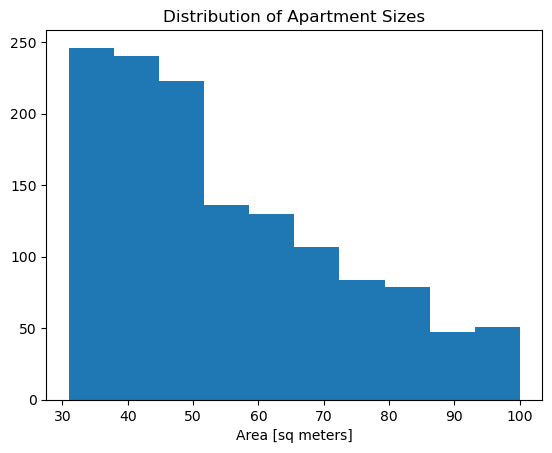

In [10]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

Calculate the summary statistics for df using the describe method.

In [11]:
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our wrangle function and remove them from the dataset.

Add to the wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2".

In [13]:
low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area=df["surface_covered_in_m2"].between(low,high)

Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]".

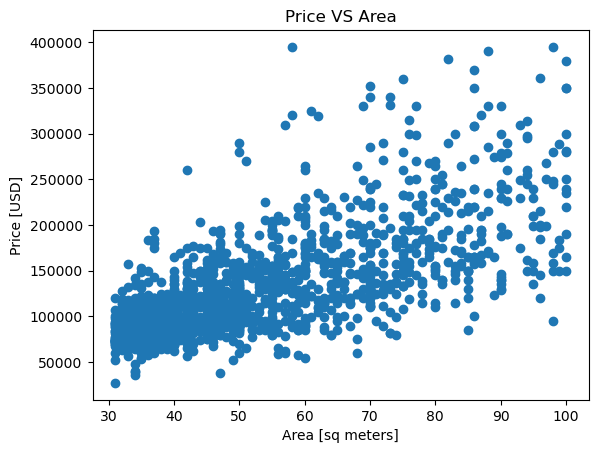

In [14]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price VS Area");

# Split

A key part in any model-building project is separating the target (the thing you want to predict) from the features (the information of model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [15]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [16]:
target = "price_aprox_usd"
y_train = df[target]
y_train.head()
y_train.shape

(1343,)

# Build Model

The first step in building a model is to establish a baseline. To do this, consider how you’ll determine if your model performs well. A helpful approach is to evaluate how a very simple, or "dumb," model would perform on the same data. Often called a naïve or baseline model, this type of model makes only one prediction — in this case, it would predict the same price for every apartment, regardless of its size. Let's begin by calculating what the baseline model's prediction should be.

Calculate the mean of your target vector y_train and assign it to the variable y_mean.

In [17]:
y_mean = y_train.mean()
y_mean


135527.83871928512

Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [18]:
y_pred_baseline = [y_mean] * len(y_train)

Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

In [19]:
X_train

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
...,...
8589,42.0
8590,41.0
8593,43.0
8601,70.0


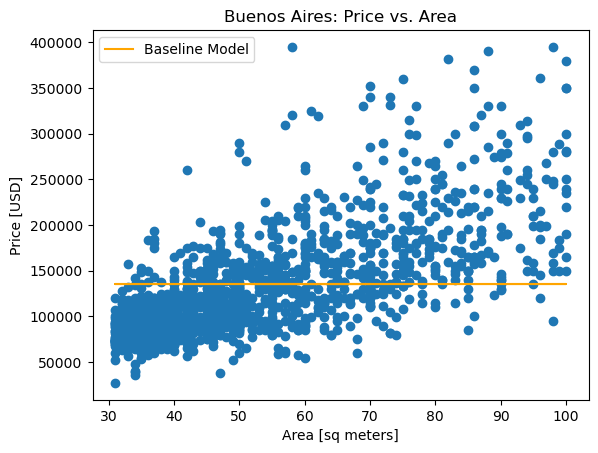

In [20]:
plt.plot(X_train["surface_covered_in_m2"],y_pred_baseline, color="orange",label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [21]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What does this information tell us? If we always predicted that an apartment price is $135,527.84, our predictions would be off by an average of $45,199.46. It also tells us that our model needs to have mean absolute error below $45,199.46 in order to be useful.

# Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model.

Instantiate a LinearRegression model named model.

In [22]:
model = LinearRegression()

Fit the model to the data, X_train and y_train.

In [23]:
model.fit(X_train,y_train)

LinearRegression()

# Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

Using the model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [24]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

Calculate the training mean absolute error for the predictions in y_pred_training as compared to the true targets in y_train.

In [25]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


Run the code below to import the test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model.

In [29]:
X_test = pd.read_csv("buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

Model's mean absolute error is 32231.955. Very impressive.

# Communicate Results

Extract the intercept from the model, and assign it to the variable intercept.

In [30]:
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


Extract the coefficient associated "surface_covered_in_m2" in the model, and assign it to the variable coefficient.

In [33]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)


Model coefficient for "surface_covered_in_m2": 2253.12


Complete the code below and run the cell to print the equation that the model has determined for predicting apartment price based on size.

In [34]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model".

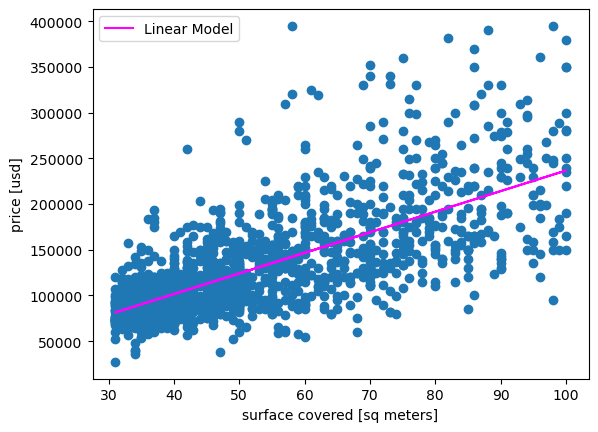

In [35]:
plt.plot(X_train, model.predict(X_train), color="magenta", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();